# Clustering = Facebook Live Seller In Thailand

Clustering merupakan sebuah teknik yang digunakan untuk menemukan sub-kelompok atau kluster. Prinsip dari clustering adalah data-data yang termasuk dalam kluster yang sama “diharapkan” memiliki kesamaan satu dengan yang lainnya, sedangkan data-data yang ada dalam kluster yang berbeda cukup berbeda dari satu kluster dengan cluster yang lainnya.Meskipun tanpa label, clustering memanfaatkan “karakter/pola” pada data bahwa data yang “mirip” akan berdekatan, seperti pada gambar di samping

#Outline

1. Business Understanding
2. Data Understanding
     * Summary data
     * Missing Value
     * data visualization
3. Data Preparation
4. Modeling
     * K-Means
     * Visualisasi Kluster
5. Model Evaluation
     * Cluster Cardinality
     * Cluster Magnitude
     * Elbow Method
6. Kesimpulan


# Business Understanding



Facebook Live sangat berpengaruh terhadap kegiatan jual beli produk-produk yang dapat dipasarkan di platform sosial media Facebook. Hal ini dikarenakan Facebook merupakan salah satu sosial media yang saat ini banyak digunakan orang dan dinilai optimal perannya dalam pemasaran. Dengan demikian maka memanfaatkan fitur Facebook Live dalam dunia bisnis diharapkan dapat mengoptimalkan pemasaran produk dengan adanya interaksi langsung terhadap penjual dan pembeli. Dengan adanya interaksi langsung pula maka timbal balik berupa like, comment, dan share dapat ditinjau dengan efektif agar mempermudah pemasaran produk.

# Data Understanding

Import Libraries

In [ ]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical data visualization
%matplotlib inline

Ignore Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel(r'/content/DataSetFacebookLiveSeller.xlsx')

## Summary Data

In [ ]:
# check shape of dataset
df.shape

(7050, 16)

Dari hasil diatas dapat dilihat bahwa terdapat 7050 baris dan 16 kolom pada dataset ini.

In [ ]:
# Preview the Dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,2016-10-09 10:30:00,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
# View Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

## Missing Value

In [ ]:
# Check for missing value in dataset
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Dari hasil diatas dapat dilihat bahwa ada 4 kolom yang kosong sehingga dilakukan penghapusan atau drop kolom yang kosong sebelum data diproses

In [ ]:
# Drop redundant columns
df.drop(['Column1','Column2','Column3','Column4'],axis=1, inplace=True)

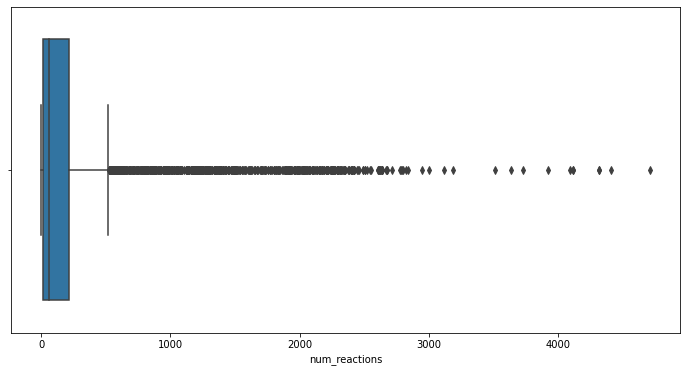

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="num_reactions",data=df)
plt.show()

In [ ]:
# Again view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Dapat dilihat bahwa untuk kolom yang kosong sudah dihapus dari dataset

In [ ]:
# view the statistical summary of numerical variables
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Dari hasil diatas dapat dilihat jumlah dari masing-masing variabel dan dapat dilihat juga terkait dnegan mean, standar deviasi, nilai minimum, kuartil 1, kuartil 2, kuartil 3, dan nilai maksimum dari masing-masing variabel

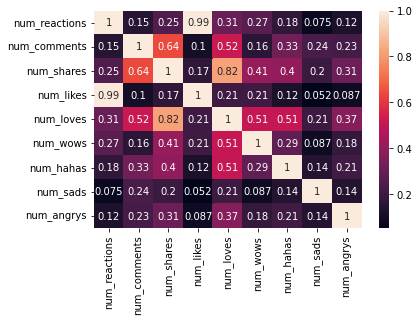

In [ ]:
# Visualisasikan hubungan antara variabel numerik
sns.heatmap(df.corr(), annot=True)
plt.show()

Dari hasil diatas dapat dilihat bahwa yang memiliki korelasi tertinggi itu adalah num_reactions dan num_likes yaitu sebesar 0.99, selanjutnya itu ada num_share dan num_loves sebesar 0.82, dan yang ketiga itu ada num_share dan num_comments sebesar 0.64

Karena dalam data set ada 3 variabel object dan 9 variabel int64, maka disini akan mengulas terkait dengan 3 variabel object

In [ ]:
# view the labels in the variable
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [ ]:
# view how many different types of variables are there
len(df['status_id'].unique())

6997

Dapat dilihat bahwa jumlah variabel uniknya itu sebanyak 6997 di status_id dari total baris sebanyak 7050. maka ini bukan variabel yang dapat digunakan, maka variabel ini dihapus atau drop

In [ ]:
# view the labels in the variable
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43',
       datetime.datetime(2016, 10, 9, 10, 30)], dtype=object)

In [ ]:
# view how many different types of variables are there
len(df['status_published'].unique())

6913

Dapat dilihat bahwa jumlah variabel uniknya itu sebanyak 6913 di status_published dari total baris sebanyak 7050. maka ini bukan variabel yang dapat digunakan, maka variabel ini dihapus atau drop

In [ ]:
# view labels in the variable
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
# view how many different types of variables are there
len(df['status_type'].unique())

4

Dapat dilihat bahwa ada 4 kategori dari labels di status type

In [ ]:
# remove status_id dan status_published dari dataset
df.drop(['status_id','status_published'],axis=1, inplace=True)

In [ ]:
# View data summary lagi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [ ]:
# Preview dataset lagi
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


Dapat dilihat bahwa ada 1 kolom yang merupakan variabel non-numerik, maka data status_type akan diubah menjadi integer

# Data Preparation

Mengubah data status_type menjadi integer

In [ ]:
X = df
y = df['status_type']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type']=le.fit_transform(X['status_type'])
y=le.transform(y)

In [ ]:
# Summary dari X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


Dapat dilihat bahwa dari data diatas dtype data sudah menjadi int64

In [ ]:
# dataset X
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


Scaling

In [ ]:
cols = X.columns

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X=ms.fit_transform(X)

X=pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# Modeling

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

Algoritma K-Means bertujuan untuk memilih centroid untuk meminimalkan inertia, atau dengan cluster sum of squared criterion

In [ ]:
# Inertia
kmeans.inertia_

237.75726404419646

Dengan nilai diatas, maka model yang digunakan dalam data ini tidak cocok untuk data ini

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score:{0:0.2f}'.format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score:0.01


Didapatkan tingkat akurasi yang lemah yaitu sebesar 1% untuk model unsupervised di data ini

In [ ]:
df['clusters']=kmeans.labels_

In [ ]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
0,3,529,512,262,432,92,3,1,1,0,1
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,1
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0,0
7047,1,2,0,0,1,1,0,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0,0


(array([4351.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2699.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

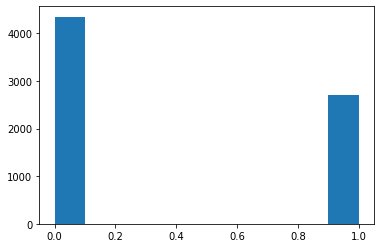

In [ ]:
plt.hist(df['clusters'])

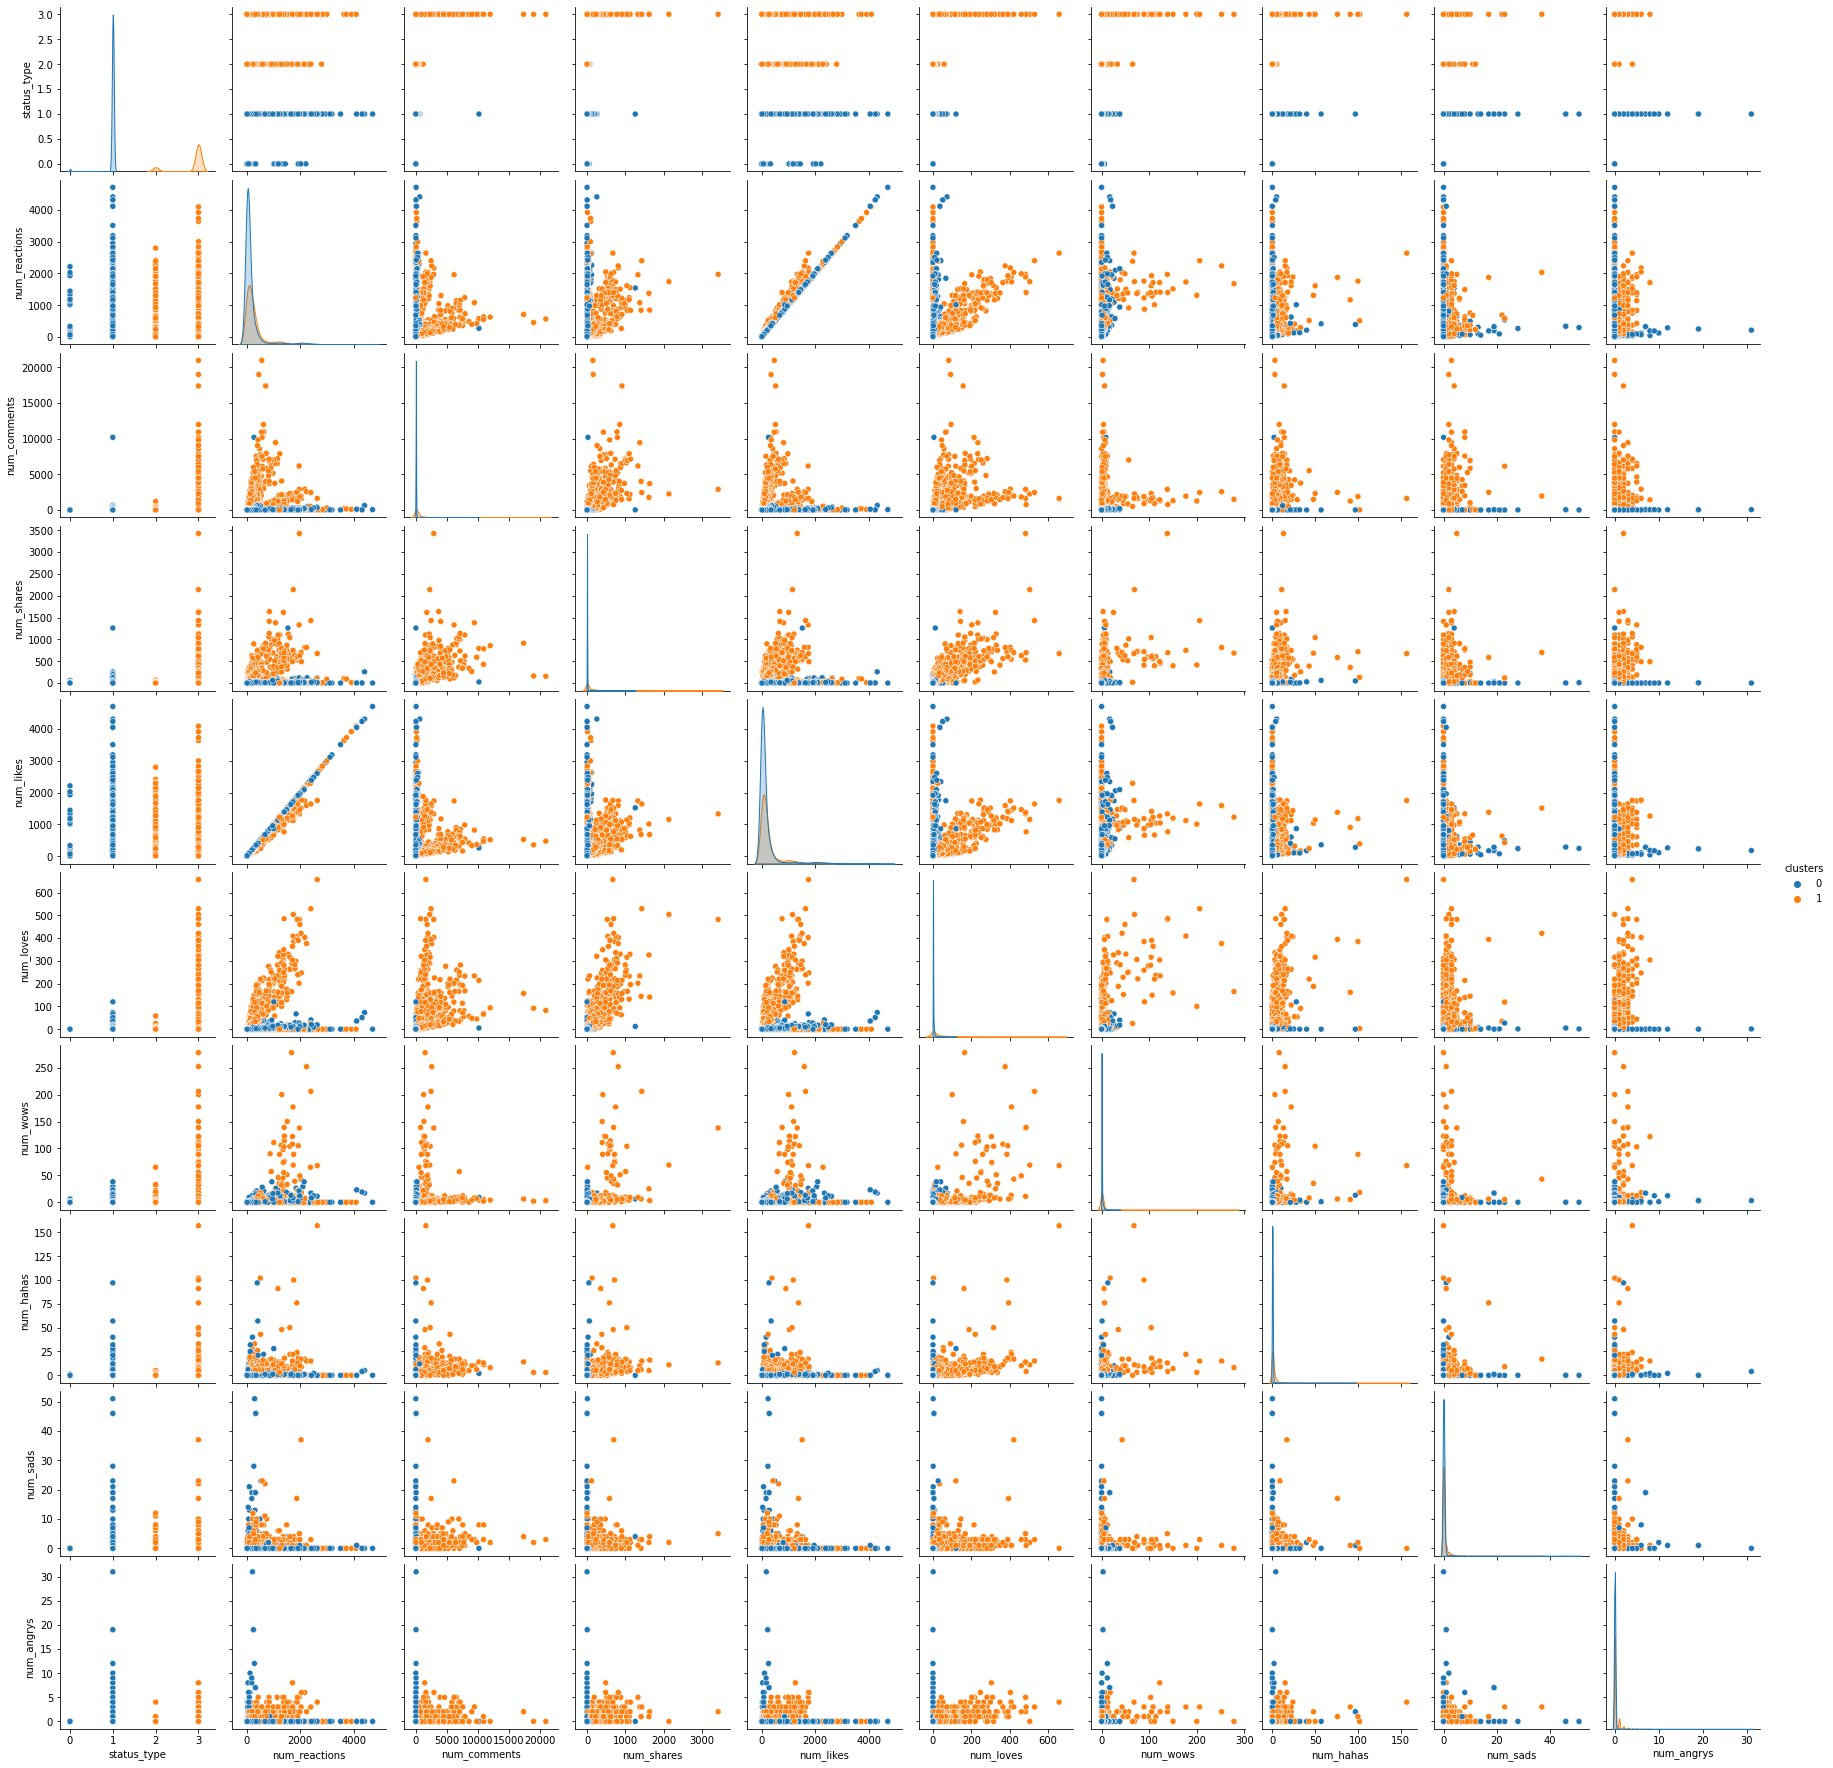

In [ ]:
sns.pairplot(df,hue='clusters')

# Model Evaluation

# Cluster Cardinality & Magnitude

KMeans dengan kluster yang berbeda

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


Dari 2 klaster yang berbeda diatas didapatkan bahwa dengan klaster sebesar 4 memberikan tingkat akurasi sebesar 62% pada model, sehingga ini cocok atau bagus digunakan pada data ini.

In [ ]:
kmeans.labels_

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
df['clusters']=kmeans.labels_
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,1
7046,1,16,0,0,14,1,0,1,0,0,1
7047,1,2,0,0,1,1,0,0,0,0,1
7048,1,351,12,22,349,2,0,0,0,0,1


(array([2424.,    0.,    0., 4116.,    0.,    0.,  315.,    0.,    0.,
         195.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

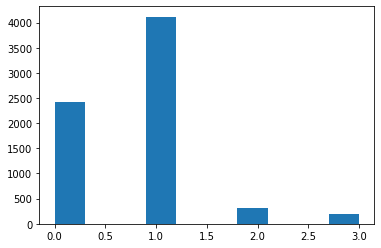

In [ ]:
plt.hist(df['clusters'])

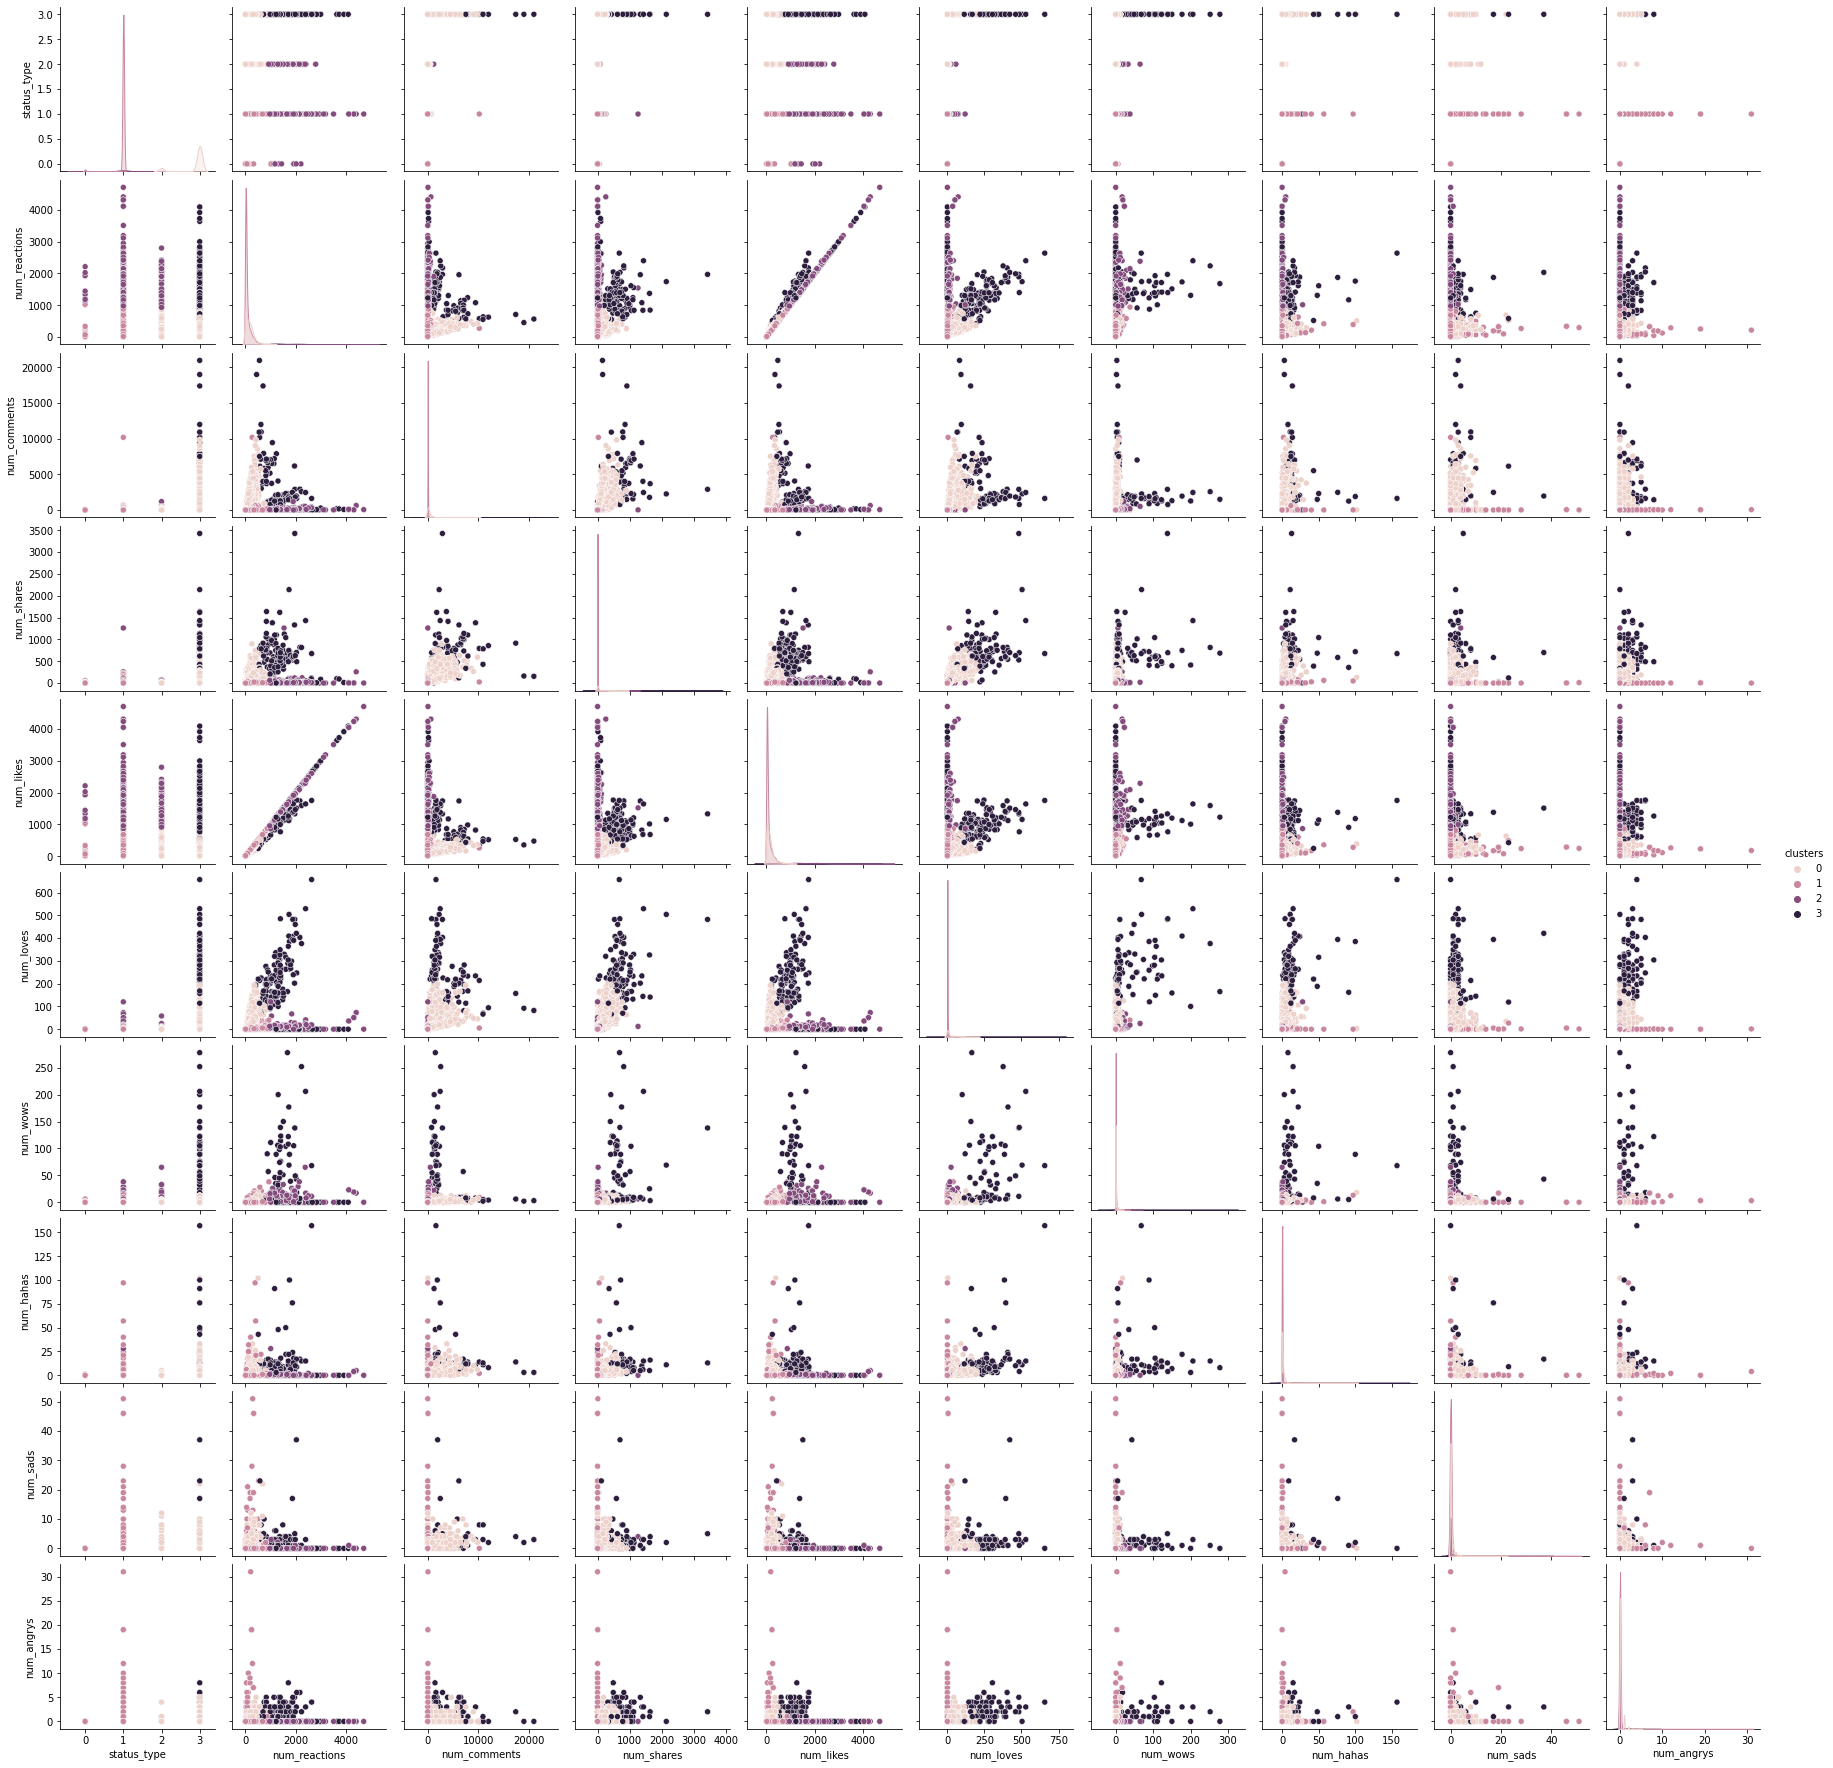

In [ ]:
sns.pairplot(df,hue='clusters')

# Metode Elbow

untuk menemukan kelas yang optimal

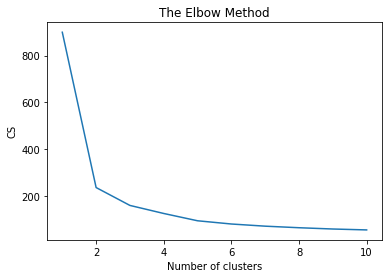

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

a. berdasarkan plot diatas, dapat dilihat bahwa sikunya ada di k=2

b. dengan k=2 bisa dianggap sebagai cluster yang bagus dalam data ini

c. tetapi didapatkan bahwa tingkat akurasi data ini adalah 1% dengan k=2,

d. maka dari perhitungan di cardinality dan magnitude bahwa klaster yang bagus itu di k=4

# Hasil dan Kesimpulan

1. di project ini menggunakan teknik unsupervised clustering yang terkenal yaitu K-Means Clustering.

2. dengan menggunakan metode elbow didapatkan k=2 dna bisa dianggap sebagai cluster yang bagus untuk digunakan dalam data ini.

3. dalam model ini didapatkan inertia yang tinggi yaitu sebesar 237.7572. jadi dengan hasil itu tidak bagus digunakan untuk model data ini.

4. didapatkan akurasi classification yang lemah yaitu 1% dengan k=2 dengan unsupervised model.

5. jadi, dengan mengganti nilai K dan didapatkan tingkat akurasi classification sebesar 62% dengan k=4

6. dapat disimpulkan bahwa k=4 adalah cluster yang paling bagus atau optimal yang dapat digunakan dalam model ini.